# **Project: Credit Card Fraud Detection using Predictive analytics**




1. **Problem Statement**: To built a fraud detection model to help credit card companies to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

2. **Dataset**:


*   The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions.

*   The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

*   Due to confidentiality issues, the original features and more background information about the data is not provided within the dataset. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'.





In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/Colab Notebooks/Credit_Card_Fraud_Detection/data

/content/drive/MyDrive/Colab Notebooks/Credit_Card_Fraud_Detection/data


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**3. Loading the dataset**

In [5]:
df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


4. **Exploratory Data Analysis (EDA)**


array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

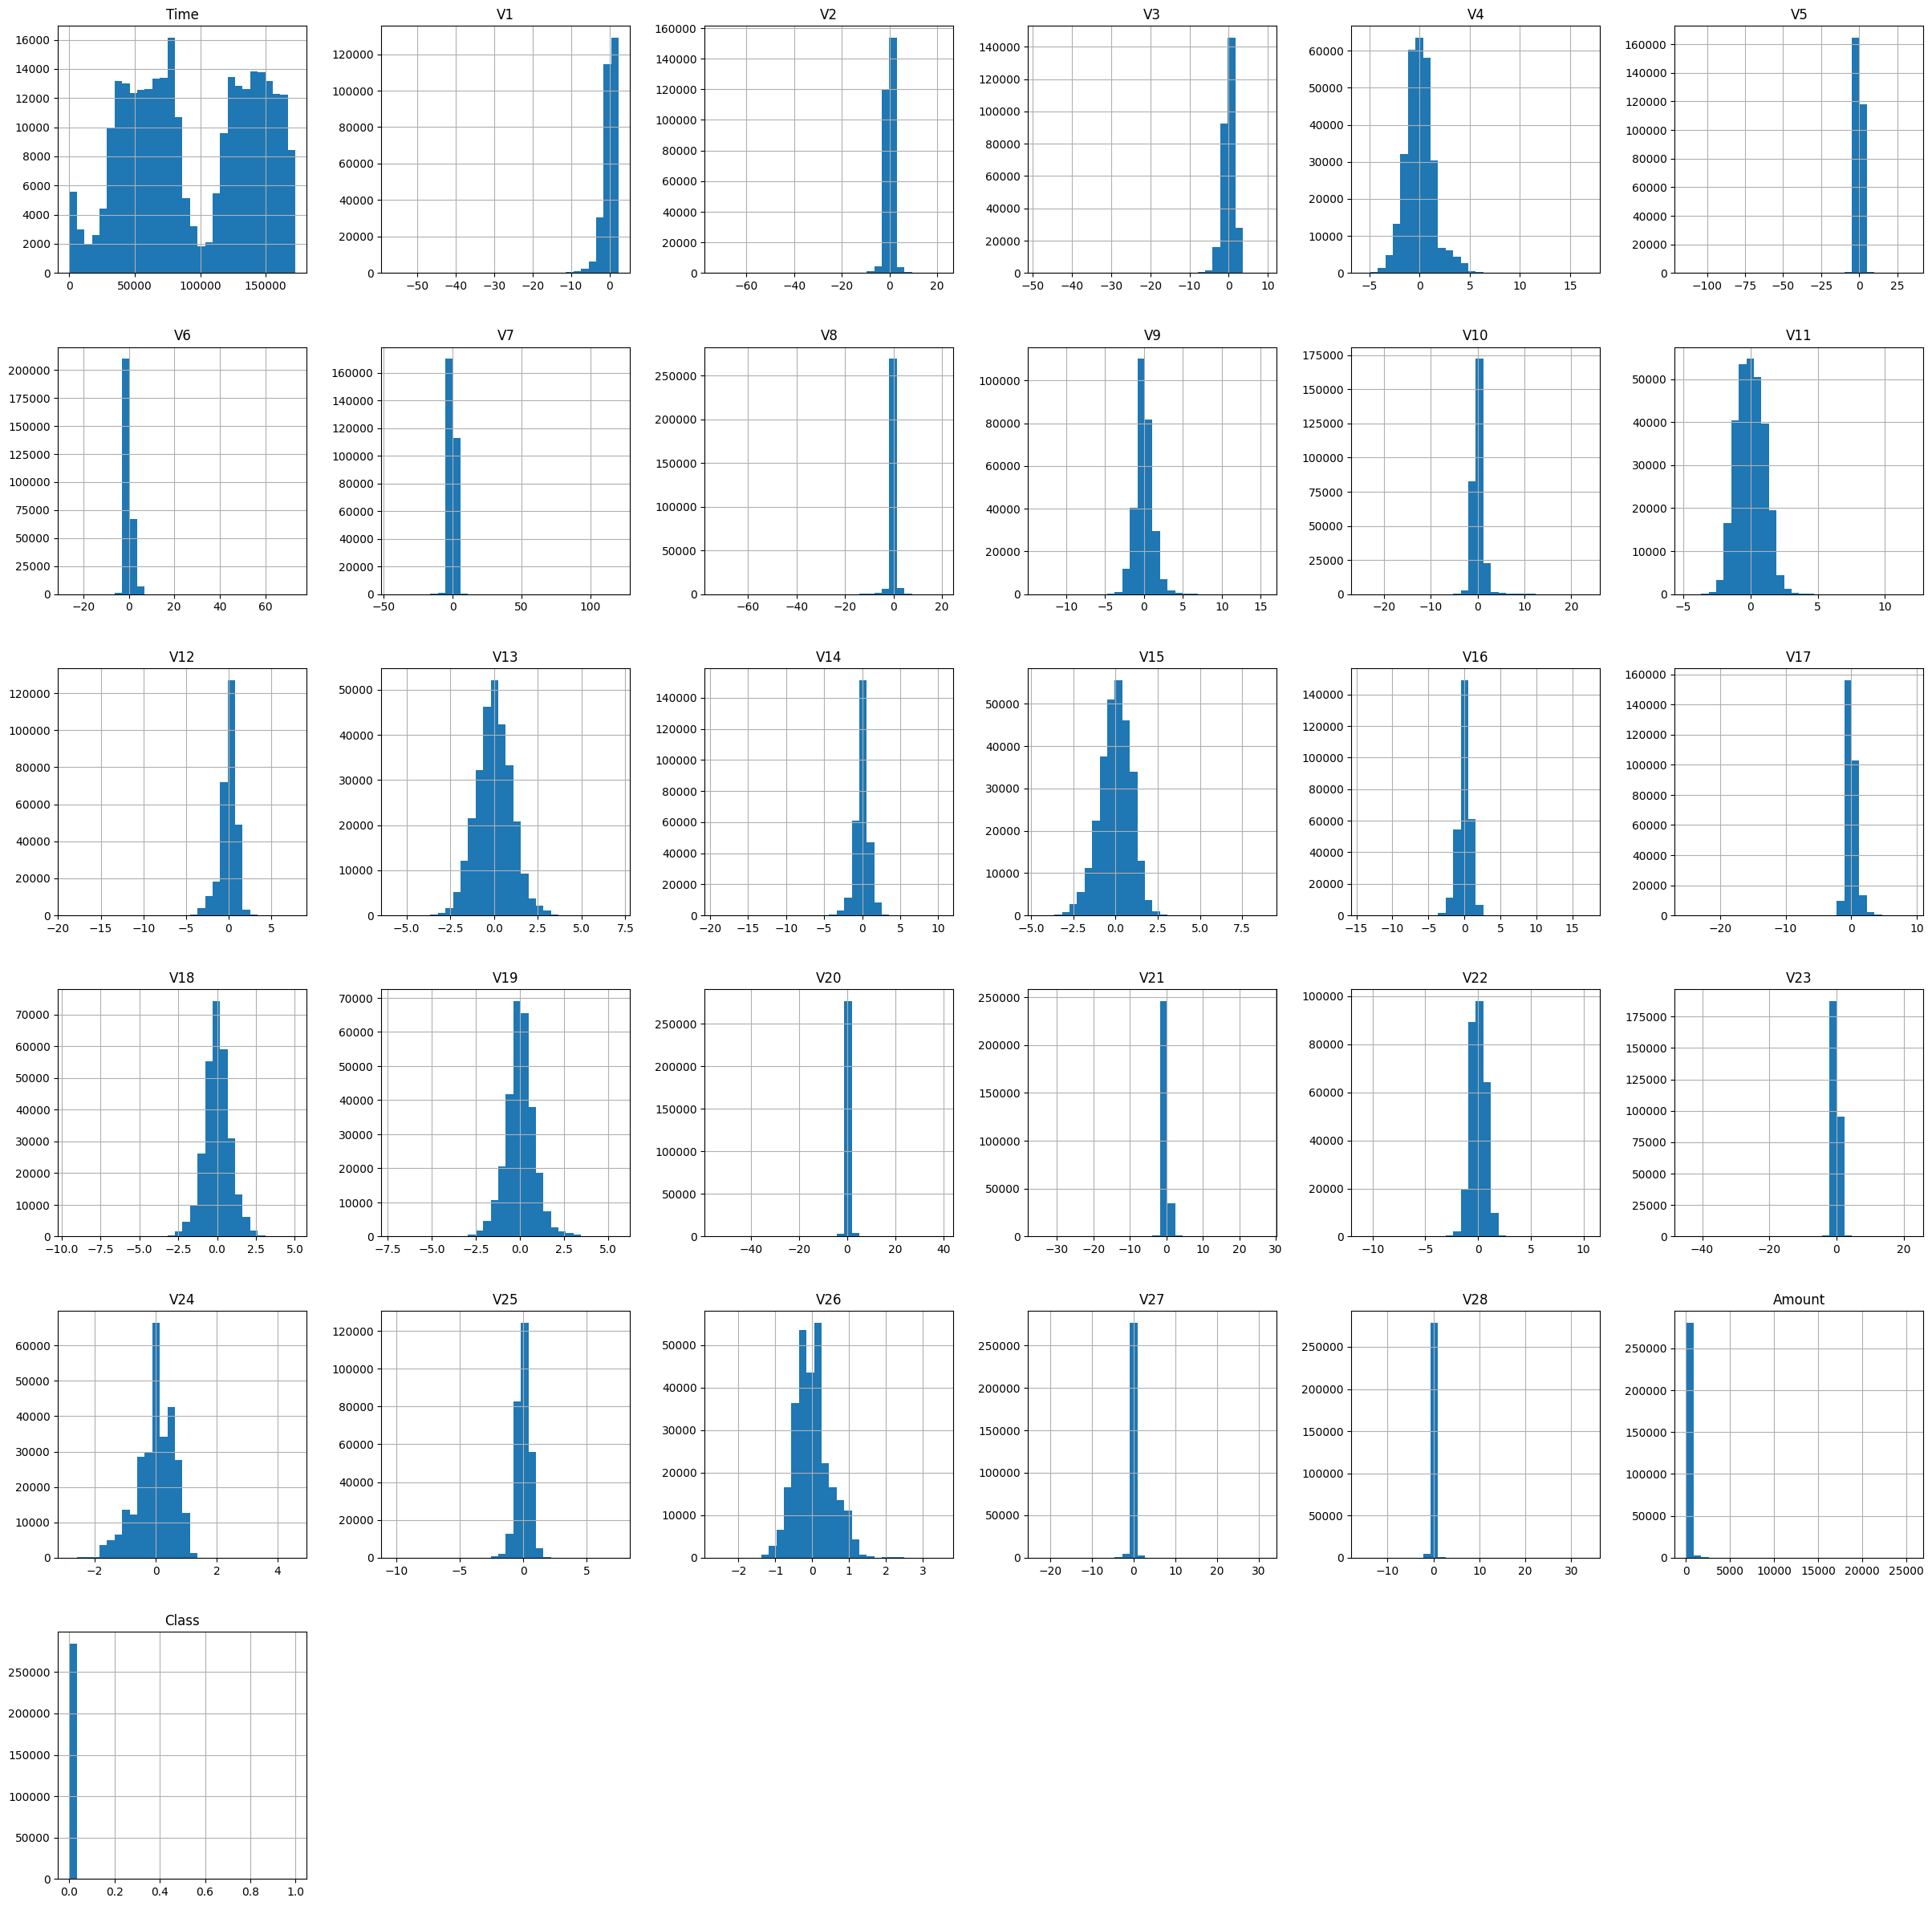

In [6]:
df.hist(bins=30, figsize=(30, 30))

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
df['Class'].value_counts()

,count
Class,
0,284315
1,492


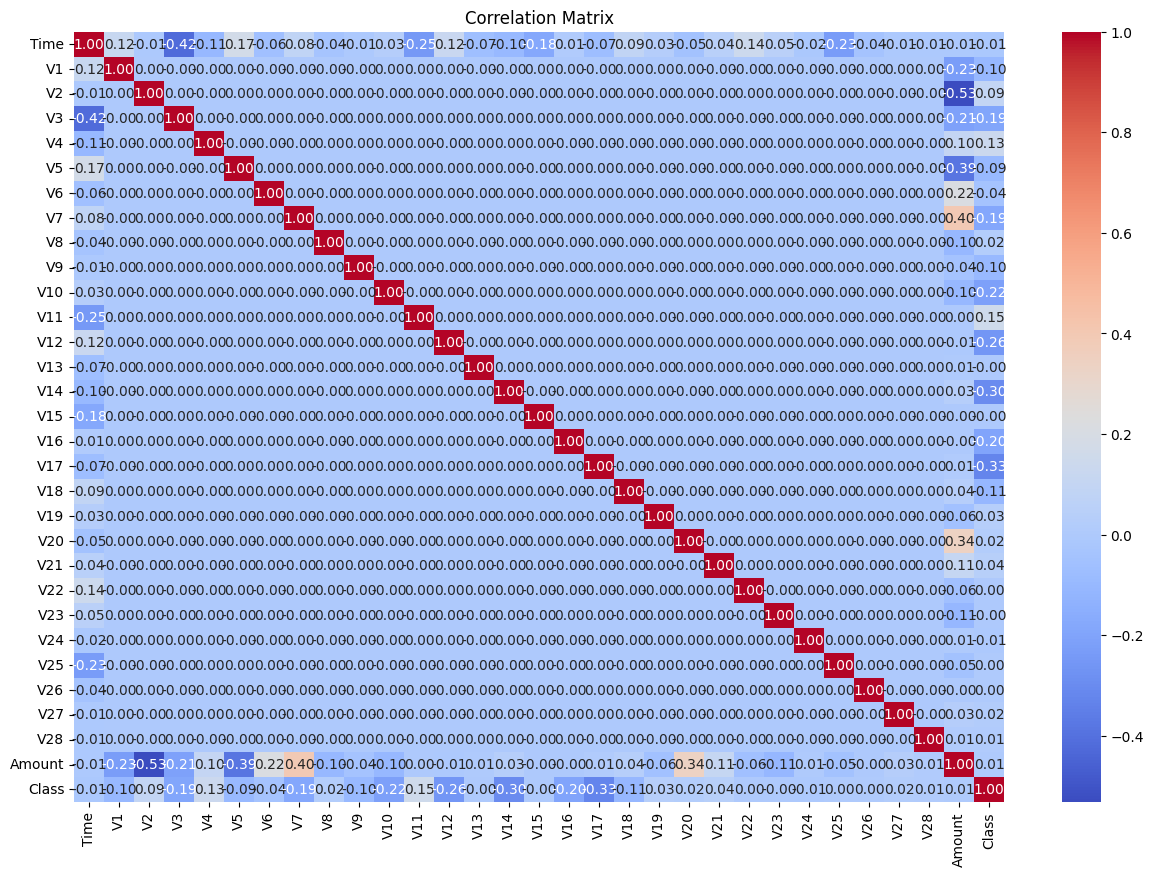

In [29]:
import seaborn as sns

# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation Matrix')
plt.show()

**5. Data Preprocessing**

Normalizing the Amount and Time Feature, the transaction amount are scaled using RobustScaler for better performance in machine learning models.

In [9]:
import sklearn.metrics as metrics
from sklearn.preprocessing import RobustScaler
new_df=df.copy()
new_df['Amount']=RobustScaler().fit_transform(new_df['Amount'].values.reshape(-1,1))
time=new_df['Time']
new_df['Time']=(time-time.min())/(time.max()-time.min())
new_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,0.000006,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,0.000006,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,0.000012,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.999965,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.296653,0
284803,0.999971,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.038986,0
284804,0.999977,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.641096,0
284805,0.999977,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.167680,0


In [10]:
new_df=new_df.sample(frac=1, random_state=1) # Always produces the same shuffle.
new_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
169876,0.693938,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,0.358468,...,-0.075208,0.045536,0.380739,0.023440,-2.220686,-0.201146,0.066501,0.221180,-0.282401,0
127467,0.453377,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,-0.704298,...,-0.128619,-0.368565,0.090660,0.401147,-0.261034,0.080621,0.162427,0.059456,-0.279746,0
137900,0.476770,-0.318193,1.118618,0.969864,-0.127052,0.569563,-0.532484,0.706252,-0.064966,-0.463271,...,-0.305402,-0.774704,-0.123884,-0.495687,-0.018148,0.121679,0.249050,0.092516,-0.294977,0
21513,0.183556,-1.328271,1.018378,1.775426,-1.574193,-0.117696,-0.457733,0.681867,-0.031641,0.383872,...,-0.220815,-0.419013,-0.239197,0.009967,0.232829,0.814177,0.098797,-0.004273,-0.084119,0
134700,0.468326,1.276712,0.617120,-0.578014,0.879173,0.061706,-1.472002,0.373692,-0.287204,-0.084482,...,-0.160161,-0.430404,-0.076738,0.258708,0.552170,0.370701,-0.034255,0.041709,-0.296793,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21440,0.183261,-2.986845,-8.663978,-1.910863,0.664058,-3.934875,0.861269,1.647511,-0.480963,-1.546866,...,1.252092,-0.993085,-2.173147,0.145570,-0.235062,-0.227411,-0.382702,0.404045,32.002515,0
117583,0.432480,0.937083,-0.849673,0.524186,-0.020031,-0.606327,0.692302,-0.463724,0.148857,0.785062,...,-0.143322,-0.479981,-0.237902,-0.715247,0.251418,0.975406,-0.060168,0.023771,2.086495,0
73349,0.318852,-1.149963,1.696462,1.637114,2.658991,-0.021502,0.192287,0.205204,0.588754,-1.187820,...,0.025147,0.086506,-0.262748,0.321538,0.341667,0.210343,-0.162047,0.031193,-0.201495,0
267336,0.941757,1.754554,-0.699398,-0.076332,0.443915,-0.672082,0.389061,-0.807534,0.202915,0.858635,...,0.141950,0.358412,0.259748,0.746839,-0.560808,0.104636,-0.005853,-0.019622,1.017257,0


In [11]:
train,test,val=new_df[:240000],new_df[240000:262000],new_df[262000:]
train['Class'].value_counts(),test['Class'].value_counts(),val['Class'].value_counts()

(Class
 0    239589
 1       411
 Name: count, dtype: int64,
 Class
 0    21955
 1       45
 Name: count, dtype: int64,
 Class
 0    22771
 1       36
 Name: count, dtype: int64)

In [12]:
train_np,test_np,val_np=train.to_numpy(),test.to_numpy(),val.to_numpy()
train_np.shape,test_np.shape,val_np.shape

((240000, 31), (22000, 31), (22807, 31))

In [13]:
x_train,y_train=train_np[:,:-1],train_np[:,-1]
x_test,y_test=test_np[:,:-1],test_np[:,-1]
x_val,y_val=val_np[:,:-1],val_np[:,-1]
x_train.shape,y_train.shape,x_test.shape,y_test.shape,x_val.shape,y_val.shape

((240000, 30), (240000,), (22000, 30), (22000,), (22807, 30), (22807,))

**6. Model Building**

In [14]:
from sklearn.linear_model import LogisticRegression
logistic_model=LogisticRegression()
logistic_model.fit(x_train,y_train)
logistic_model.score(x_train,y_train)

0.9992375

**a) Logistic Regression**

In [15]:
from sklearn.metrics import classification_report, accuracy_score
print("Logistic Regression Accuracy:", accuracy_score(y_test, logistic_model.predict(x_test)))
print(classification_report(y_test,logistic_model.predict(x_test),target_names=['Not Fraud','Fraud']))

Logistic Regression Accuracy: 0.9991363636363636
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     21955
       Fraud       0.88      0.67      0.76        45

    accuracy                           1.00     22000
   macro avg       0.94      0.83      0.88     22000
weighted avg       1.00      1.00      1.00     22000



**b) Neural Network Model**

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, InputLayer
from tensorflow.keras.callbacks import ModelCheckpoint
shallow_nn=Sequential()
shallow_nn.add(InputLayer((x_train.shape[1],)))
shallow_nn.add(Dense(2,'relu'))
shallow_nn.add(BatchNormalization())
shallow_nn.add(Dense(1,'sigmoid'))

checkpoint = ModelCheckpoint('shallow_nn.keras', save_best_only=True)
shallow_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
shallow_nn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 2)                   │              62 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 2)                   │               8 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 73 (292.00 B)

 Trainable params: 69 (276.00 B)

 Non-trainable params: 4 (16.00 B)

In [17]:
shallow_nn.fit(x_train,y_train,epochs=5,validation_data=(x_val,y_val),callbacks=[checkpoint])

Epoch 1/5
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9749 - loss: 0.1559 - val_accuracy: 0.9992 - val_loss: 0.0079
Epoch 2/5
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9993 - loss: 0.0037 - val_accuracy: 0.9989 - val_loss: 0.0126
Epoch 3/5
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9994 - loss: 0.0031 - val_accuracy: 0.9992 - val_loss: 0.0087
Epoch 4/5
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9993 - loss: 0.0036 - val_accuracy: 0.9992 - val_loss: 0.0090
Epoch 5/5
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9994 - loss: 0.0028 - val_accuracy: 0.9992 - val_loss: 0.0094


In [18]:
  def nn_prediction(model,x):
    return (model.predict(x).flatten()>0.5).astype(int)
nn_prediction(shallow_nn,x_test)

688/688 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([0, 0, 0, ..., 0, 0, 0])

In [19]:
print("Neural Network Accuracy:", accuracy_score(y_test, nn_prediction(shallow_nn,x_test)))
print(classification_report(y_test,nn_prediction(shallow_nn,x_test),target_names=['Not Fraud','Fraud']))

688/688 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Neural Network Accuracy: 0.9993636363636363
688/688 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     21955
       Fraud       0.88      0.80      0.84        45

    accuracy                           1.00     22000
   macro avg       0.94      0.90      0.92     22000
weighted avg       1.00      1.00      1.00     22000



**c) Random Forest Classifier**

In [20]:
from sklearn.ensemble import RandomForestClassifier

rf_model=RandomForestClassifier(max_depth=2,n_jobs=-1)
rf_model.fit(x_train,y_train)
print("Random Forest Accuracy:", accuracy_score(y_test, nn_prediction(shallow_nn,x_test)))
print(classification_report(y_test,rf_model.predict(x_test), target_names=['Not Fraud','Fraud']))

688/688 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Random Forest Accuracy: 0.9993636363636363
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     21955
       Fraud       0.90      0.60      0.72        45

    accuracy                           1.00     22000
   macro avg       0.95      0.80      0.86     22000
weighted avg       1.00      1.00      1.00     22000



**d) Gradient Boosting Classifier**

In [21]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0, max_depth=1, random_state=0)
gbc.fit(x_train, y_train)
print("GradientBoosting Accuracy:", accuracy_score(y_test,gbc.predict(x_test) ))
print(classification_report(y_test, gbc.predict(x_test), target_names=['Not Fraud', 'Fraud']))

GradientBoosting Accuracy: 0.9990454545454546
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     21955
       Fraud       0.82      0.69      0.75        45

    accuracy                           1.00     22000
   macro avg       0.91      0.84      0.87     22000
weighted avg       1.00      1.00      1.00     22000



**e) Linear SVC model**

In [22]:
from sklearn.svm import LinearSVC
svm_model=LinearSVC(class_weight='balanced')
svm_model.fit(x_train,y_train)
print("SVM Accuracy:", accuracy_score(y_test,svm_model.predict(x_test) ))
print(classification_report(y_test,svm_model.predict(x_test), target_names=['Not Fraud','Fraud']))

SVM Accuracy: 0.9816363636363636
              precision    recall  f1-score   support

   Not Fraud       1.00      0.98      0.99     21955
       Fraud       0.09      0.91      0.17        45

    accuracy                           0.98     22000
   macro avg       0.55      0.95      0.58     22000
weighted avg       1.00      0.98      0.99     22000



**7. Model Evaluation**

In [27]:
from sklearn.metrics import confusion_matrix

# Printing classification report for all models
print("Logistic Regression Classification Report: \n", classification_report(y_test,logistic_model.predict(x_test),target_names=['Not Fraud','Fraud']))
print("Neural Network Classification Report: \n", classification_report( y_test,nn_prediction(shallow_nn,x_test),target_names=['Not Fraud','Fraud']))
print("Random Forest Classification Report: \n", classification_report( y_test,rf_model.predict(x_test), target_names=['Not Fraud','Fraud']))
print("Gradient Boosting Classification Report: \n", classification_report(y_test, gbc.predict(x_test), target_names=['Not Fraud', 'Fraud']))
print("Linear SVM Classification Report: \n", classification_report( y_test,svm_model.predict(x_test), target_names=['Not Fraud','Fraud']))

print("*"* 150)
# Print confusion matrix for all models
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test,logistic_model.predict(x_test)))
print("Neural Network Confusion Matrix:\n", confusion_matrix(y_test,nn_prediction(shallow_nn,x_test)))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test,rf_model.predict(x_test)))
print("Gradient Boosting Confusion Matrix:\n", confusion_matrix(y_test,gbc.predict(x_test)))
print("Linear SVM Confusion Matrix:\n", confusion_matrix(y_test,svm_model.predict(x_test)))

Logistic Regression Classification Report: 
               precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     21955
       Fraud       0.88      0.67      0.76        45

    accuracy                           1.00     22000
   macro avg       0.94      0.83      0.88     22000
weighted avg       1.00      1.00      1.00     22000

688/688 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Neural Network Classification Report: 
               precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     21955
       Fraud       0.88      0.80      0.84        45

    accuracy                           1.00     22000
   macro avg       0.94      0.90      0.92     22000
weighted avg       1.00      1.00      1.00     22000

Random Forest Classification Report: 
               precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     21955
       Fraud       0.90      0.60      0.72        45

    accuracy     

**8. Conclusion**

Neural Network model is chosen to be most effective model for fraud detection due to its superior performance across
multiple metrics. It has a accuracy of 99.936%, has highest value for F1-Score which balances precision and recall. Also, leads for a combination for Precision and Recall across all models.